In [128]:
import pandas as pd
import pandas_profiling
import numpy as np

import warnings
warnings.filterwarnings('ignore')

In [129]:
df = pd.read_csv('diabetes.csv')
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [130]:
profile = pandas_profiling.ProfileReport(df)
profile.to_file(output_file="EDA_Profiling.html")

**Inference**

1. Based on the Profile Report of the data, there are 768 records and 9 columns.
2. BloodPressure has 35 (4.6%) zeros
3. BMI has 11 (1.4%) zeros
4. Insulin has 374 (48.7%) zeros
5. Pregnancies has 111 (14.5%) zeros --- This can have 0 as a value hence we wont be treating them
6. SkinThickness has 227 (29.6%) zeros

In [131]:
import seaborn as sns

# Dealing with Blood Pressure Column

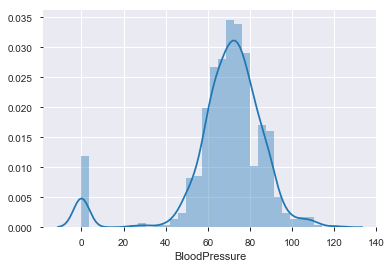

In [132]:
sns.distplot(df.BloodPressure)

In [133]:
df['BloodPressure'].replace(0,np.NaN,inplace=True)

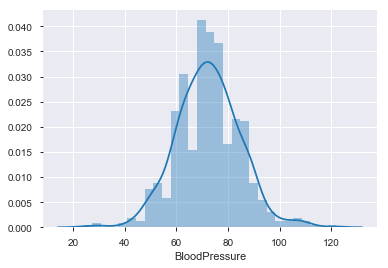

In [134]:
df['BloodPressure'] = df['BloodPressure'].fillna(method='ffill')
sns.distplot(df.BloodPressure)

# Dealing with BMI Column

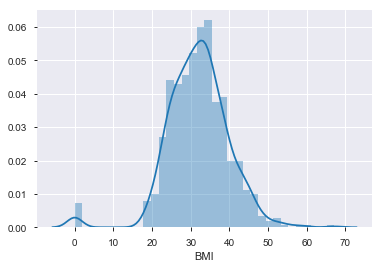

In [135]:
sns.distplot(df['BMI'])

In [136]:
df['BMI'].replace(0,np.NaN,inplace=True)

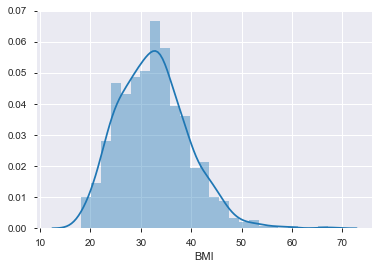

In [137]:
df['BMI'] = df['BMI'].fillna(method='ffill')
sns.distplot(df['BMI'])

# Now considering Insulin Column

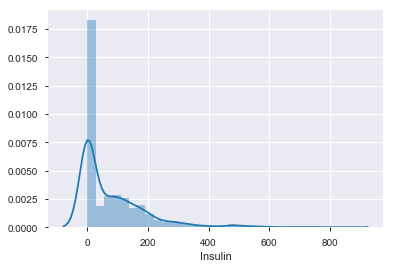

In [138]:
sns.distplot(df.Insulin)

In [139]:
df['Insulin'].replace(0,np.NaN,inplace=True)

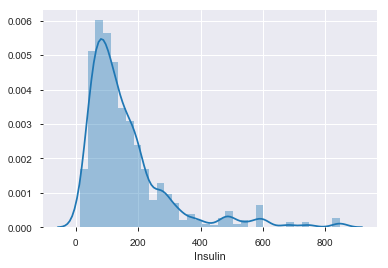

In [143]:
df['Insulin'] = df['Insulin'].fillna(method='ffill')
sns.distplot(df['Insulin'])

# Now working with Skin Thickness Column

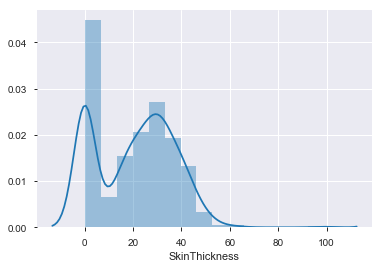

In [144]:
sns.distplot(df['SkinThickness'])

In [145]:
df['SkinThickness'].replace(0,np.NaN,inplace=True)

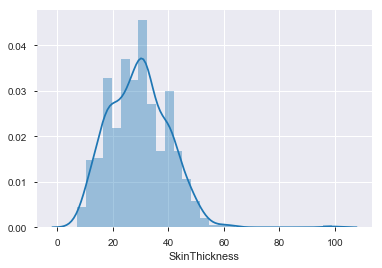

In [146]:
df['SkinThickness'] = df['SkinThickness'].fillna(method ='ffill')
sns.distplot(df['SkinThickness'])

# Cleaning of Data is Done ...

In [147]:
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72.0,35.0,94.0,33.6,0.627,50,1
1,1,85,66.0,29.0,94.0,26.6,0.351,31,0
2,8,183,64.0,29.0,94.0,23.3,0.672,32,1
3,1,89,66.0,23.0,94.0,28.1,0.167,21,0
4,0,137,40.0,35.0,168.0,43.1,2.288,33,1


# Now lets do the Bivariate Analysis

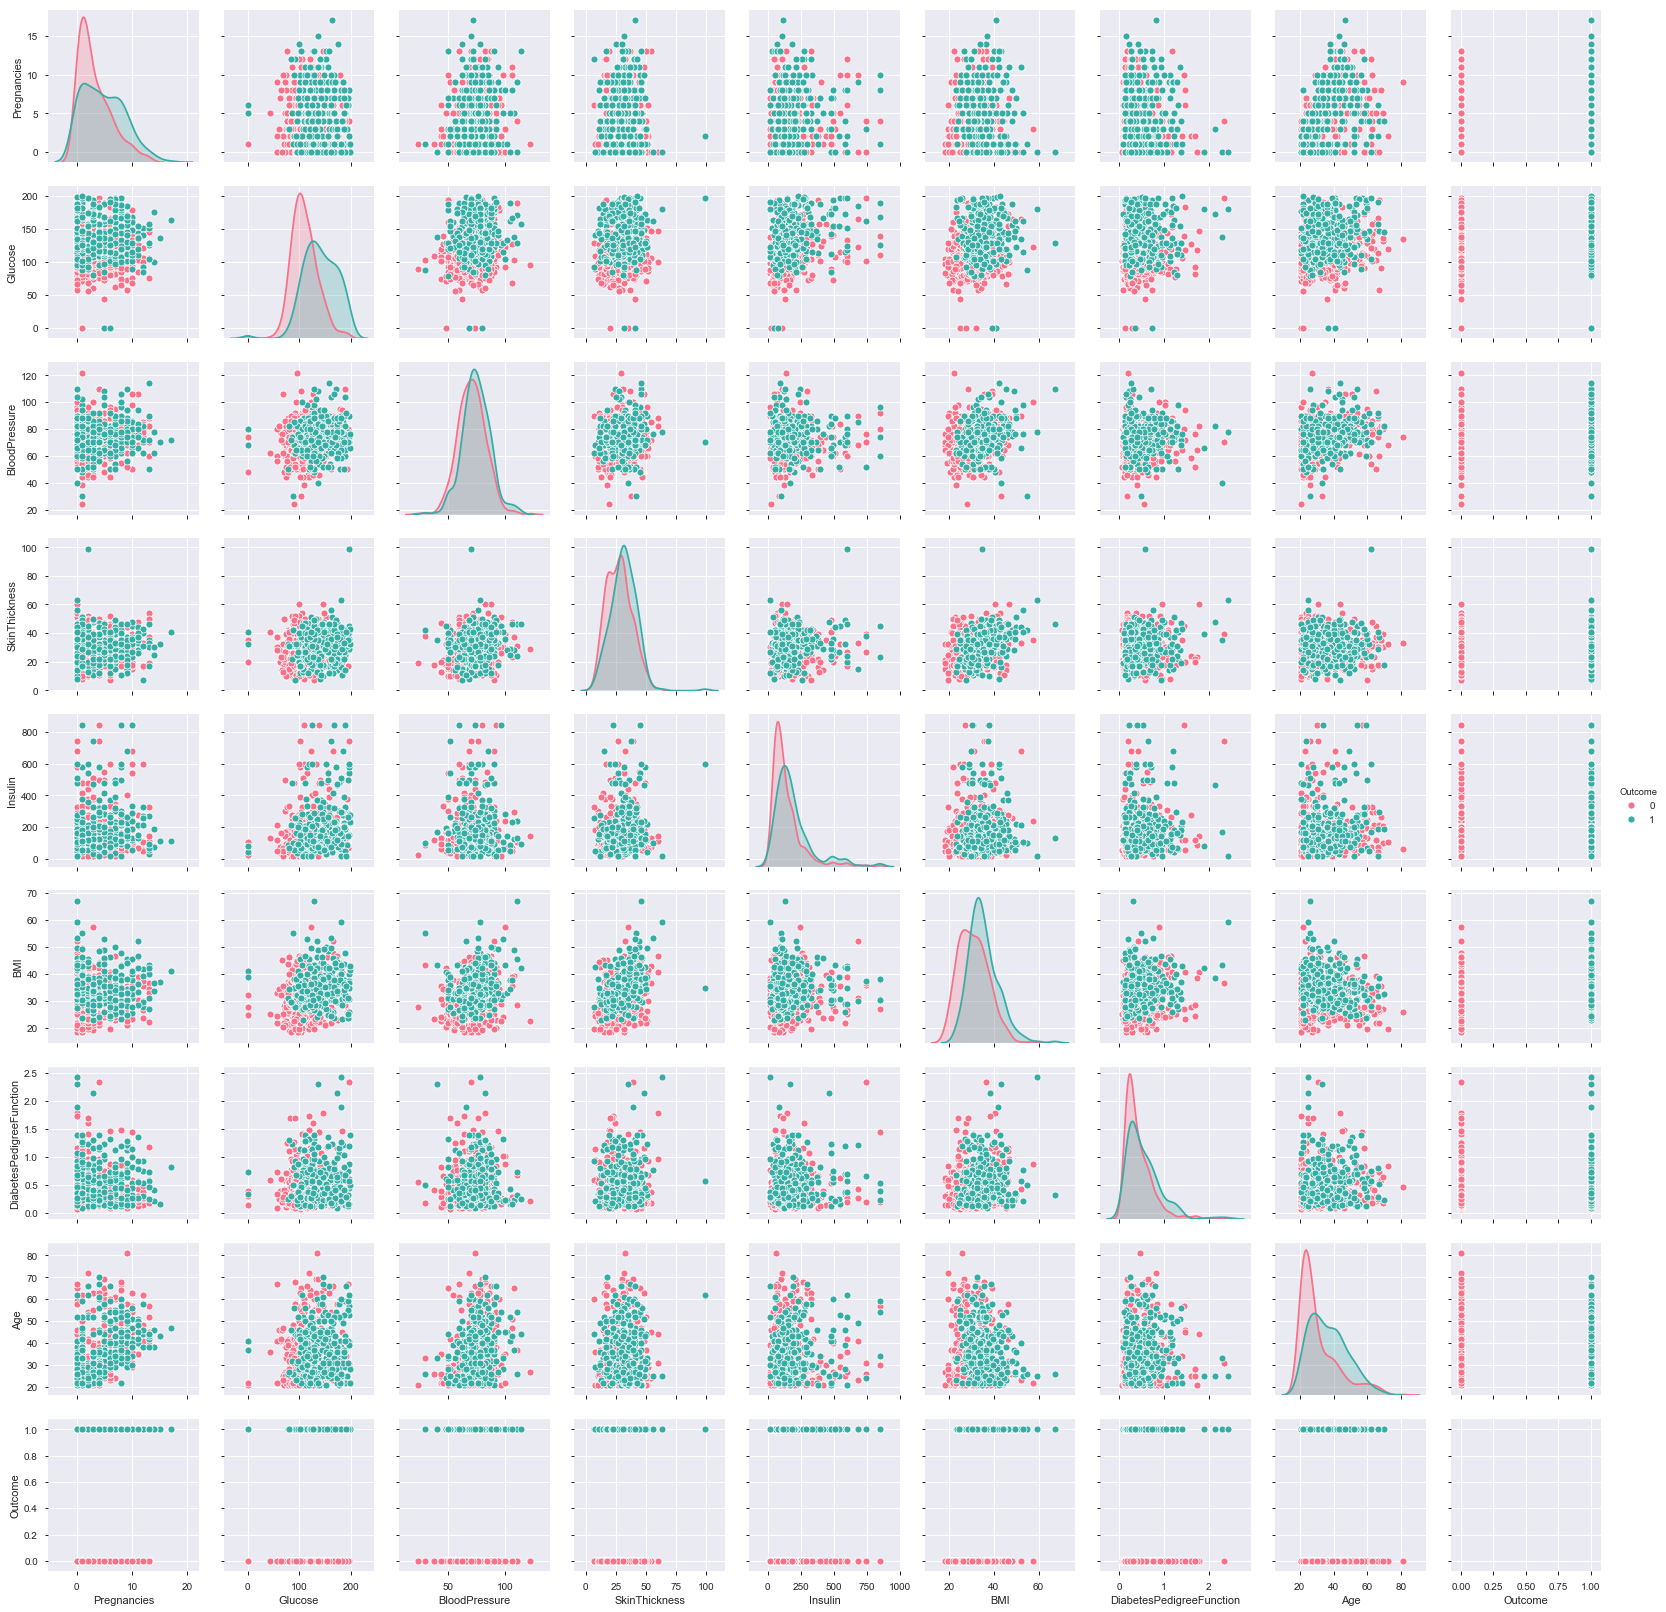

In [148]:
sns.pairplot(data=df,hue='Outcome',palette='husl')

# Lets Start Building the Models -- Models to be Covered are:
1. Logistic Regression
2. kNN
3. Naive Bayes
4. Decision Tree
5. Random Forest
6. Logistic Regression -- Bagged
7. kNN -- Bagged
8. Naive Bayes - Bagged
9. Decision Tree -- Bagged
10. Logistic Regression -- Boosted
11. kNN -- Boosted
12. Naive Bayes -- Boosted
13. Decision Tree -- Boosted
14. Random Forest --Boosted
15. Gradient Boosting Classifier
16. Light GBM (LGBM)

In [149]:
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report,roc_auc_score,roc_curve
from sklearn.model_selection import train_test_split, KFold
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression

In [150]:
x = df.drop('Outcome',axis=1)
y = df.Outcome

sc = StandardScaler()
x = sc.fit_transform(x)

x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.3,random_state=2)

# Basic Logistic Regression

In [158]:
LR = LogisticRegression()
LR.fit(x_train,y_train)
y_pred_LR = LR.predict(x_test)

In [159]:
print(classification_report(y_test,y_pred_LR))

              precision    recall  f1-score   support

           0       0.78      0.88      0.83       155
           1       0.68      0.50      0.58        76

    accuracy                           0.76       231
   macro avg       0.73      0.69      0.70       231
weighted avg       0.75      0.76      0.75       231



In [160]:
roc_auc_score(y_test,y_pred_LR)

0.6919354838709678

In [161]:
MOdel = []
ROC_AUC_Accuracy = []

In [162]:
Model = ['Logistic Regression']
ROC_AUC_Accuracy = [roc_auc_score(y_test,y_pred_LR)]

# kNN 

In [163]:
from sklearn.neighbors import KNeighborsClassifier
params = {
    
    'n_neighbors': range(1,20),
    'weights': ['uniform','distance'],
    'algorithm': ['ball_tree','kd_tree','brute','auto'],
    'p': [1,2,3]
}

knn = KNeighborsClassifier()

gs = GridSearchCV(estimator=knn,n_jobs=-1,cv=5,param_grid=params,scoring='recall')
gs.fit(x,y)

GridSearchCV(cv=5, error_score='raise-deprecating',
             estimator=KNeighborsClassifier(algorithm='auto', leaf_size=30,
                                            metric='minkowski',
                                            metric_params=None, n_jobs=None,
                                            n_neighbors=5, p=2,
                                            weights='uniform'),
             iid='warn', n_jobs=-1,
             param_grid={'algorithm': ['ball_tree', 'kd_tree', 'brute', 'auto'],
                         'n_neighbors': range(1, 20), 'p': [1, 2, 3],
                         'weights': ['uniform', 'distance']},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring='recall', verbose=0)

In [164]:
gs.best_params_

{'algorithm': 'ball_tree', 'n_neighbors': 3, 'p': 3, 'weights': 'uniform'}

### Creating a kNN model based on the above best parameters

In [165]:
knn = KNeighborsClassifier(**gs.best_params_)
knn.fit(x_train,y_train)
y_pred_knn = knn.predict(x_test)

In [166]:
print(classification_report(y_test,y_pred_knn))

              precision    recall  f1-score   support

           0       0.75      0.77      0.76       155
           1       0.51      0.49      0.50        76

    accuracy                           0.68       231
   macro avg       0.63      0.63      0.63       231
weighted avg       0.68      0.68      0.68       231



In [172]:
roc_auc_score(y_test,y_pred_knn)

0.6305178268251274

In [173]:
Model.append('k-Nearest-Neighbours')
ROC_AUC_Accuracy.append(roc_auc_score(y_test,y_pred_knn))

In [174]:
Model, ROC_AUC_Accuracy

(['Logistic Regression', 'k-Nearest-Neighbours'],
 [0.6919354838709678, 0.6305178268251274])

# Naive Bayes

In [175]:
from sklearn.naive_bayes import GaussianNB

nb = GaussianNB()
nb.fit(x_train,y_train)
y_pred_nb = nb.predict(x_test)

In [176]:
print(classification_report(y_test,y_pred_nb))

              precision    recall  f1-score   support

           0       0.77      0.82      0.79       155
           1       0.58      0.50      0.54        76

    accuracy                           0.71       231
   macro avg       0.67      0.66      0.66       231
weighted avg       0.71      0.71      0.71       231



In [177]:
roc_auc_score(y_test,y_pred_nb)

0.6596774193548387

In [178]:
Model.append('Naive Bayes')
ROC_AUC_Accuracy.append(roc_auc_score(y_test,y_pred_nb))

Model, ROC_AUC_Accuracy

(['Logistic Regression', 'k-Nearest-Neighbours', 'Naive Bayes'],
 [0.6919354838709678, 0.6305178268251274, 0.6596774193548387])

# Decision Tree

In [179]:
from sklearn.tree import DecisionTreeClassifier

params = {
    
    'criterion':['gini','entropy'],
    'splitter':['best','random'],
    'max_depth':range(1,10,1),
    'max_leaf_nodes':range(2,10,1),
    'max_features':['auto','log2']
    
}

dt = DecisionTreeClassifier()

gs = GridSearchCV(estimator=dt,n_jobs=-1,cv=3,param_grid=params,scoring='recall')
gs.fit(x,y)

GridSearchCV(cv=3, error_score='raise-deprecating',
             estimator=DecisionTreeClassifier(class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features=None,
                                              max_leaf_nodes=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              presort=False, random_state=None,
                                              splitter='best'),
             iid='warn', n_jobs=-1,
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': range(1, 10),
                         'm

In [180]:
gs.best_params_

{'criterion': 'entropy',
 'max_depth': 7,
 'max_features': 'log2',
 'max_leaf_nodes': 8,
 'splitter': 'best'}

### Using the best params to build a Decision Tree

In [181]:
dt = DecisionTreeClassifier(**gs.best_params_)
dt.fit(x_train,y_train)
y_pred_dt = dt.predict(x_test)

In [182]:
print(classification_report(y_test,y_pred_dt))

              precision    recall  f1-score   support

           0       0.72      0.93      0.81       155
           1       0.63      0.25      0.36        76

    accuracy                           0.71       231
   macro avg       0.67      0.59      0.58       231
weighted avg       0.69      0.71      0.66       231



In [183]:
roc_auc_score(y_test,y_pred_dt)

0.5895161290322581

In [184]:
Model.append('Decision Tree')
ROC_AUC_Accuracy.append(roc_auc_score(y_test,y_pred_dt))

Model, ROC_AUC_Accuracy

(['Logistic Regression',
  'k-Nearest-Neighbours',
  'Naive Bayes',
  'Decision Tree'],
 [0.6919354838709678,
  0.6305178268251274,
  0.6596774193548387,
  0.5895161290322581])

# Random Forest

In [185]:
from sklearn.ensemble import RandomForestClassifier

params = {
    
    'n_estimators':range(10,100,10),
    'criterion':['gini','entropy'],
    #'splitter':['best','random'],
    'max_depth':range(2,10,1),
    'max_leaf_nodes':range(2,10,1),
    'max_features':['auto','log2']
    
}

rf = RandomForestClassifier()

gs = GridSearchCV(estimator=rf,param_grid=params,cv=3,scoring='recall',n_jobs=-1)
gs.fit(x,y)

GridSearchCV(cv=3, error_score='raise-deprecating',
             estimator=RandomForestClassifier(bootstrap=True, class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features='auto',
                                              max_leaf_nodes=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              n_estimators='warn', n_jobs=None,
                                              oob_score=False,
                                              random_state=None, verbose=0,
                                              warm_start=False),
             iid

In [186]:
gs.best_params_

{'criterion': 'gini',
 'max_depth': 9,
 'max_features': 'log2',
 'max_leaf_nodes': 9,
 'n_estimators': 10}

## Using the above best params to build a Random Forest

In [187]:
rf = RandomForestClassifier(**gs.best_params_)
rf.fit(x_train,y_train)
y_pred_rf = rf.predict(x_test)

In [188]:
print(classification_report(y_test,y_pred_rf))

              precision    recall  f1-score   support

           0       0.78      0.87      0.82       155
           1       0.66      0.50      0.57        76

    accuracy                           0.75       231
   macro avg       0.72      0.69      0.70       231
weighted avg       0.74      0.75      0.74       231



In [189]:
roc_auc_score(y_test,y_pred_rf)

0.6854838709677419

In [190]:
Model.append('Random Forest')
ROC_AUC_Accuracy.append(roc_auc_score(y_test,y_pred_rf))

Model, ROC_AUC_Accuracy

(['Logistic Regression',
  'k-Nearest-Neighbours',
  'Naive Bayes',
  'Decision Tree',
  'Random Forest'],
 [0.6919354838709678,
  0.6305178268251274,
  0.6596774193548387,
  0.5895161290322581,
  0.6854838709677419])

# Now Moving Towards Bagging

### Creating Bagging Calssifiers in one Go

In [191]:
from sklearn.ensemble import BaggingClassifier,RandomForestClassifier

LR_Bag = BaggingClassifier(base_estimator=LR,n_estimators=100,n_jobs=-1,random_state=1)
knn_Bag = BaggingClassifier(base_estimator=knn,n_estimators=100,n_jobs=-1,random_state=1)
nb_Bag = BaggingClassifier(base_estimator=nb,n_estimators=100,n_jobs=-1,random_state=1)
dt_Bag = BaggingClassifier(base_estimator=dt,n_estimators=100,n_jobs=-1,random_state=1)
rf = RandomForestClassifier(n_estimators=100,criterion='entropy',n_jobs=-1,random_state=1)

In [209]:
from sklearn.metrics import auc
kf = KFold(n_splits=5,shuffle=True,random_state=1)
for model,name in zip([LR_Bag,knn_Bag,nb_Bag,dt_Bag,rf],['Bagged-LR','Bagged-kNN','Bagged-NB','Bagged-DT','Random Forest']):
    roc_acc = []
    for train,test in kf.split(x,y):
        x_train = x[train,:]
        x_test = x[test,:]
        y_train = y[train]
        y_test = y[test]
        model.fit(x_train,y_train)
        y_pred = model.predict(x_test)
        score = roc_auc_score(y_test,y_pred)
        fpr,tpr,_ = roc_curve(y_test,y_pred)
        roc_acc.append(auc(fpr,tpr))
    Model.append(name)
    ROC_AUC_Accuracy.append(np.mean(roc_acc))
    print('The AUC Score for')
    print('%s is %0.02f with variacne of (+/-) %0.5f'%(name,np.mean(roc_acc),np.var(roc_acc,ddof=1)))
    print()

The AUC Score for
Bagged-LR is 0.72 with variacne of (+/-) 0.00067

The AUC Score for
Bagged-kNN is 0.69 with variacne of (+/-) 0.00177

The AUC Score for
Bagged-NB is 0.71 with variacne of (+/-) 0.00127

The AUC Score for
Bagged-DT is 0.71 with variacne of (+/-) 0.00099

The AUC Score for
Random Forest is 0.71 with variacne of (+/-) 0.00077



## Now Moving Towards Boosting

### Creating Boosting Classifiers in One Go

In [195]:
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from lightgbm import LGBMModel,LGBMClassifier

In [210]:
LR_Boost = AdaBoostClassifier(base_estimator=LR,n_estimators=100,learning_rate=0.01,random_state=1)
knn_Boost = AdaBoostClassifier(base_estimator=knn,n_estimators=100,learning_rate=0.01,random_state=1)
nb_Boost = AdaBoostClassifier(base_estimator=nb,n_estimators=100,learning_rate=0.01,random_state=1)
dt_Boost = AdaBoostClassifier(base_estimator=dt,n_estimators=100,learning_rate=0.01,random_state=1)
rf_Boost = AdaBoostClassifier(base_estimator=rf,n_estimators=100,learning_rate=0.01,random_state=1)
gb_Boost = GradientBoostingClassifier(n_estimators=100,learning_rate=0.01)
lgbm = LGBMClassifier(objective='binary',n_estimators=100,reg_alpha=2,reg_lambda=5,random_state=1,learning_rate=0.01,is_unbalance=True)

In [211]:
from sklearn.metrics import auc
kf = KFold(n_splits=5,shuffle=True,random_state=1)
for model,name in zip([LR_Boost,nb_Boost,dt_Boost,rf_Boost,lgbm],['Boosted-LR','Boosted-NB','Boosted-DT','Boosted - Random Forest','LGBM']):
    roc_acc = []
    for train,test in kf.split(x,y):
        x_train = x[train,:]
        x_test = x[test,:]
        y_train = y[train]
        y_test = y[test]
        model.fit(x_train,y_train)
        y_pred = model.predict(x_test)
        score = roc_auc_score(y_test,y_pred)
        fpr,tpr,_ = roc_curve(y_test,y_pred)
        roc_acc.append(auc(fpr,tpr))
    Model.append(name)
    ROC_AUC_Accuracy.append(np.mean(roc_acc))
    print('The AUC Score for')
    print('%s is %0.02f with variacne of (+/-) %0.5f'%(name,np.mean(roc_acc),np.var(roc_acc,ddof=1)))
    print()

The AUC Score for
Boosted-LR is 0.71 with variacne of (+/-) 0.00062

The AUC Score for
Boosted-NB is 0.71 with variacne of (+/-) 0.00127

The AUC Score for
Boosted-DT is 0.70 with variacne of (+/-) 0.00108

The AUC Score for
Boosted - Random Forest is 0.71 with variacne of (+/-) 0.00123

The AUC Score for
LGBM is 0.73 with variacne of (+/-) 0.00118



In [212]:
final_result = pd.DataFrame({'Model':Model,'Accuracy':ROC_AUC_Accuracy})
final_result

,Model,Accuracy
0,Logistic Regression,0.691935
1,k-Nearest-Neighbours,0.630518
2,Naive Bayes,0.659677
3,Decision Tree,0.589516
4,Bagged-LR,0.716589
5,Bagged-kNN,0.689993
6,Bagged-NB,0.710907
7,Bagged-DT,0.710621
8,Random Forest,0.714505
9,Boosted-LR,0.708417
